In [0]:
import pandas as pd
import altair as alt
import seaborn as sns
#import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import style

# Improve Pandas display settings
pd.set_option("display.width", 600)
pd.set_option("display.max_columns", 50)

# Change Seaborn default settings
sns.set_context('talk')
style.use('ggplot')

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving renato_playlists (5).csv to renato_playlists (5) (1).csv
User uploaded file "renato_playlists (5).csv" with length 83256 bytes


In [0]:
sptfy = pd.read_csv("renato_playlists (5).csv")

In [0]:
sptfy.head()

,Unnamed: 0,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,album,album_id,artist,artist_id,duration_ms,name,popularity
0,0,0.0690,0.480,0.969,0j3p1p06deJ7f9xmJ9yG22,0.000220,9,0.0608,-7.464,1,0.0854,142.489,0.494,The Beatles (Remastered),1klALx0u4AavZNEvC4LrTL,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,163453,Back In The U.S.S.R. - Remastered,63
1,1,0.1600,0.388,0.529,5NQYyej46WQkgCbnzGD21W,0.068100,7,0.1080,-10.533,1,0.0436,150.721,0.332,The Beatles (Remastered),1klALx0u4AavZNEvC4LrTL,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,235773,Dear Prudence - Remastered,60
2,2,0.0123,0.523,0.510,2jAojvUaPoHPFSPpF0UNRo,0.000084,7,0.1080,-9.827,0,0.0514,120.432,0.789,The Beatles (Remastered),1klALx0u4AavZNEvC4LrTL,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,137840,Glass Onion - Remastered,56
3,3,0.2320,0.818,0.728,1gFNm7cXfG1vSMcxPpSxec,0.064200,10,0.2510,-8.331,1,0.0314,113.059,0.975,The Beatles (Remastered),1klALx0u4AavZNEvC4LrTL,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,188960,"Ob-La-Di, Ob-La-Da - Remastered",66
4,4,0.4250,0.792,0.763,6j67aNAPeQ31uw4qw4rpLa,0.627000,2,0.7890,-11.185,1,0.0506,89.900,0.152,The Beatles (Remastered),1klALx0u4AavZNEvC4LrTL,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,52973,Wild Honey Pie - Remastered,51


In [0]:
sptfy = sptfy.drop("Unnamed: 0", axis=1)

In [0]:
sptfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 19 columns):
acousticness        425 non-null float64
danceability        425 non-null float64
energy              425 non-null float64
id                  425 non-null object
instrumentalness    425 non-null float64
key                 425 non-null int64
liveness            425 non-null float64
loudness            425 non-null float64
mode                425 non-null int64
speechiness         425 non-null float64
tempo               425 non-null float64
valence             425 non-null float64
album               425 non-null object
album_id            425 non-null object
artist              425 non-null object
artist_id           425 non-null object
duration_ms         425 non-null int64
name                425 non-null object
popularity          425 non-null int64
dtypes: float64(9), int64(4), object(6)
memory usage: 63.2+ KB


In [0]:
print(type(sptfy))

<class 'pandas.core.frame.DataFrame'>


Björk             34
Beach House       31
The Beatles       30
The Beach Boys    27
Gorillaz          26
Xiu Xiu           22
Air               20
The National      16
Stan Getz         16
Seu Jorge         14
Beatenberg        13
John Mayer        13
Laurel Halo       12
Beck              12
Silent Poets      11
Name: artist, dtype: int64


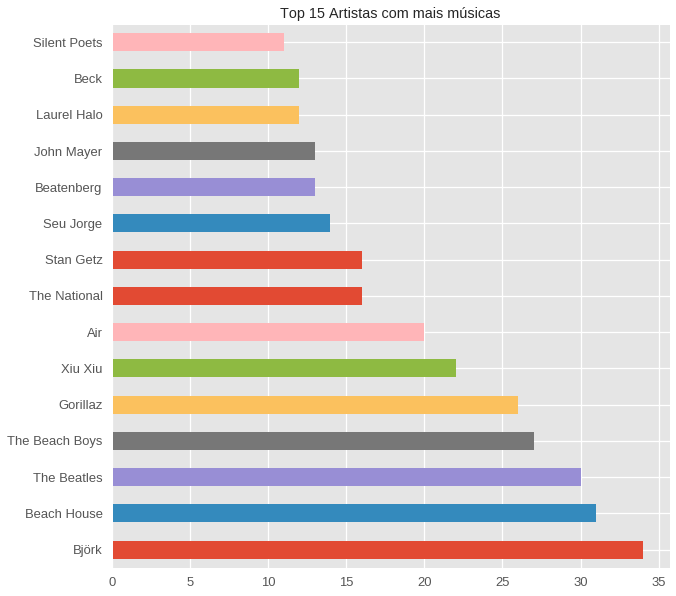

In [0]:
top_artists = sptfy.artist.value_counts().head(15)
print(top_artists)
top_artists.plot(kind='barh', figsize=(10,10))
plt.title('Top 15 Artistas com mais músicas')
plt.show()

Text(0.5, 1.0, 'Correlações entre colunas')

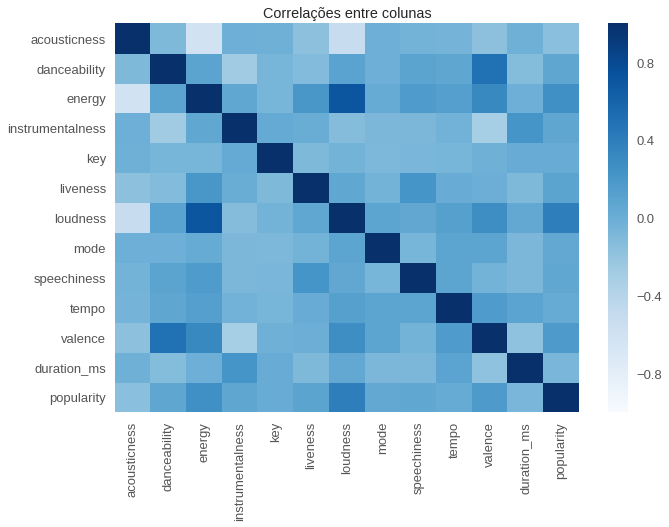

In [0]:
sns.heatmap(sptfy.corr(), cmap='Blues')
plt.title('Correlações entre colunas')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


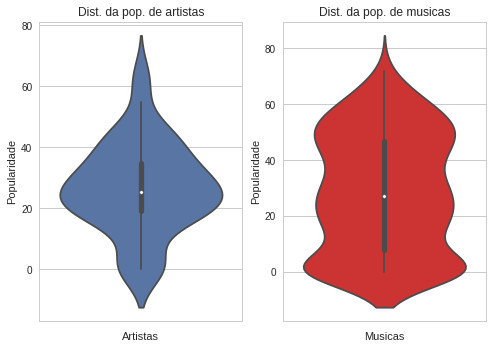

In [0]:
pop_artists = sptfy.groupby('artist').popularity.mean().sort_values(ascending=False)
#pop_artists.head(15)

sns.set(style="whitegrid")

plt.subplot(1,2,1)
sns.violinplot(y=pop_artists)
plt.title('Dist. da pop. de artistas')
plt.xlabel('Artistas')
plt.ylabel('Popularidade')

plt.subplot(1,2,2)
sns.violinplot(y=sptfy.popularity, data=sptfy, color='red', saturation=0.6)
plt.title('Dist. da pop. de musicas')
plt.xlabel('Musicas')
plt.ylabel('Popularidade')

plt.show()

In [0]:
alt.Chart(sptfy).mark_point().encode(
    x='danceability',
    y='popularity',
    tooltip='name',
)

Chart({
  data:      acousticness  danceability  energy                      id  instrumentalness  key  liveness  loudness  mode  speechiness    tempo  valence                                 album                album_id                     artist               artist_id  duration_ms                                               name  popularity
  0        0.069000         0.480  0.9690  0j3p1p06deJ7f9xmJ9yG22          0.000220    9    0.0608    -7.464     1       0.0854  142.489   0.4940              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       163453                  Back In The U.S.S.R. - Remastered          63
  1        0.160000         0.388  0.5290  5NQYyej46WQkgCbnzGD21W          0.068100    7    0.1080   -10.533     1       0.0436  150.721   0.3320              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       235773                         Dear Prudence - Remastered          60
  2        0.012300         0.523  0.5100  2jAojvUaPoHPFSPpF0UNRo          0.000084    7    0.1080    -9.827     0       0.0514  120.432   0.7890              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       137840                           Glass Onion - Remastered          56
  3        0.232000         0.818  0.7280  1gFNm7cXfG1vSMcxPpSxec          0.064200   10    0.2510    -8.331     1       0.0314  113.059   0.9750              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       188960                    Ob-La-Di, Ob-La-Da - Remastered          66
  4        0.425000         0.792  0.7630  6j67aNAPeQ31uw4qw4rpLa          0.627000    2    0.7890   -11.185     1       0.0506   89.900   0.1520              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2        52973                        Wild Honey Pie - Remastered          51
  5        0.224000         0.621  0.4590  5Z3Rd1fMcaty8g5Pn7yhBQ          0.000000    0    0.6560   -10.414     1       0.1040  114.816   0.6480              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       194160  The Continuing Story Of Bungalow Bill - Remast...          52
  6        0.020500         0.453  0.6540  389QX9Q1eUOEZ19vtzzI9O          0.003950    4    0.1720    -8.855     0       0.0317  115.000   0.7020              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       285000          While My Guitar Gently Weeps - Remastered          68
  7        0.523000         0.431  0.5400  71LsKf3xISiOlY1mj7FFPP          0.000001    9    0.1690    -9.600     0       0.0589  139.288   0.4400              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       164546               Happiness Is A Warm Gun - Remastered          57
  8        0.872000         0.472  0.2920  1swmf4hFMJYRNA8Rq9PVaW          0.000700   10    0.1280   -11.591     1       0.0321  177.624   0.8240              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       148573                        Martha My Dear - Remastered          55
  9        0.656000         0.433  0.4830  2X9H5BokS1u5O46YpNYNsZ          0.000026    9    0.5390    -9.422     1       0.1750   68.492   0.7170              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       123493                          I'm So Tired - Remastered          55
  10       0.754000         0.686  0.1270  5jgFfDIR6FR0gvlA56Nakr          0.000014    7    0.0573   -14.361     1       0.0342   93.699   0.3720              The Beatles (Remastered)  1klALx0u4AavZNEvC4LrTL                The Beatles  3WrFJ7ztbogyGnTHbHJFl2       138386                             B